In [1]:
# standard packages used to handle files
import sys
import os 
import glob
import time

# commonly used library for data manipulation
import pandas as pd

# numerical
import numpy as np

# handle images - opencv
import cv2

# machine learning library
import sklearn
import sklearn.preprocessing

# used to serialize python objects to disk and load them back to memory
import pickle

# plotting
import matplotlib.pyplot as plt

# helper functions
import helpers

# specific helper functions for feature extraction
import features

from sklearn.model_selection import train_test_split

from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB


from sklearn.metrics import log_loss

from sklearn.metrics import confusion_matrix
import pylab as pl

# tell matplotlib that we plot in a notebook
%matplotlib notebook

%matplotlib inline


In [2]:
# filepath constants, set these according to your workflow:

# where are your datasets:
dataset_path = './images/'
# where do you want to save your features and other outputs:
output_path = './output/'

In [3]:
# you don't have to change the paths here:

dataset_path_train = os.path.join(dataset_path, 'train')
dataset_path_test = os.path.join(dataset_path, 'test')

features_path = os.path.join(output_path, 'features')
features_path_train = os.path.join(features_path, 'train')
features_path_test = os.path.join(features_path, 'test')

prediction_path = os.path.join(output_path, 'predictions')

# filepatterns to write out features
filepattern_descriptor_train = os.path.join(features_path_train, 'train_features_{}.pkl')
filepattern_descriptor_test = os.path.join(features_path_test, 'test_features_{}.pkl')

# create paths in case they don't exist:
helpers.createPath(features_path)
helpers.createPath(features_path_train)
helpers.createPath(features_path_test)
helpers.createPath(prediction_path)

In [4]:
folder_paths = glob.glob(os.path.join(dataset_path_train,'*'))
label_strings = np.sort(np.array([os.path.basename(path) for path in folder_paths]))
num_classes = label_strings.shape[0]

print("Amount of classes: ", num_classes)
print("\nLabels: \n", label_strings)

Amount of classes:  12

Labels: 
 ['chicken' 'elephant' 'fox' 'german_shepherd' 'golden_retriever' 'horse'
 'jaguar' 'lion' 'owl' 'parrot' 'swan' 'tiger']


In [5]:
train_paths = dict((label_string, helpers.getImgPaths(os.path.join(dataset_path_train, label_string))) 
                   for label_string in label_strings)

test_paths = helpers.getImgPaths(dataset_path_test)

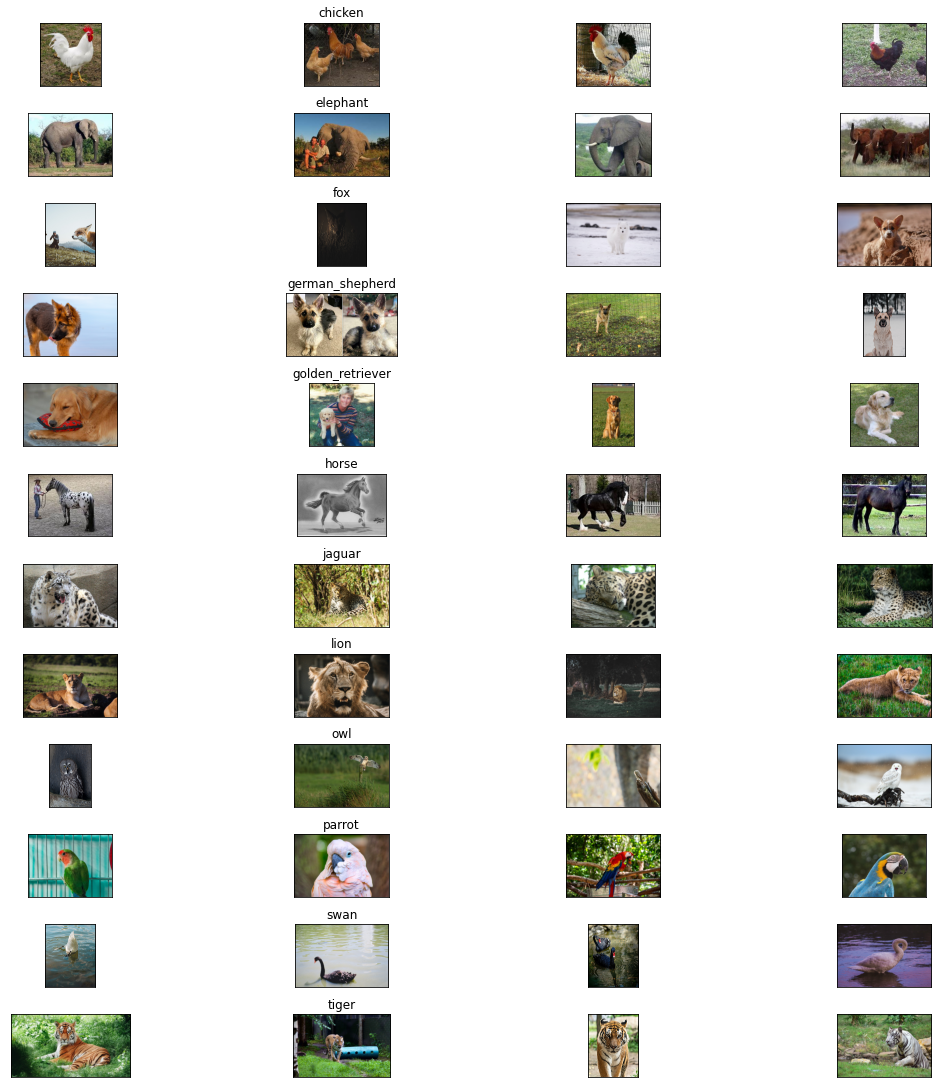

In [6]:
fig, axes = plt.subplots(nrows=num_classes, ncols=4, constrained_layout=True, figsize=(15, 15))

[ax.get_xaxis().set_visible(False) for ax_row in axes for ax in ax_row]
[ax.get_yaxis().set_visible(False) for ax_row in axes for ax in ax_row]

for idx, label_string in enumerate(label_strings):
    images = [cv2.cvtColor(cv2.imread(path), cv2.COLOR_BGR2RGB) for path in train_paths[label_string][:4]]

    for colidx in range(4):
        axes[idx, colidx].imshow(images[colidx])
        if colidx == 1: # if this is the center column
            axes[idx, colidx].set_title(label_string)

plt.show()  

In [7]:
def evaluate_models(X_train, X_valid, ytrain, yvalid, descriptor_desired):
    

    print('\n')
    
    #### SVM ####
    
    print(f" SVM ".center(40,'*'))

    # define support vector classifier
    model = SVC(kernel='linear',probability=True, random_state=42)

    # fit model
    model.fit(X_train, ytrain)
    
    display_metrics(X_train, X_valid, ytrain, yvalid, descriptor_desired, model,"SVM")
    
    
    #### KNN ####
    
    print(f" KNN ".center(40,'*'))

    # define KNN classifier
    model = KNeighborsClassifier(n_neighbors=3)

    # fit model
    model.fit(X_train, ytrain)
    
    display_metrics(X_train, X_valid, ytrain, yvalid, descriptor_desired, model,"KNN")
    
    
    #### Random Forest ####
    
    print(f" Random Forest ".center(40,'*'))
    
    # define Random Forest classifier
    model=RandomForestClassifier(n_estimators=100)
    
    # fit model
    model.fit(X_train, ytrain)
    
    display_metrics(X_train, X_valid, ytrain, yvalid, descriptor_desired, model,"Random Forest")
    
    

    #### Gaussian Naive Bayes ####
    
    print(f" Gaussian Naive Bayes ".center(40,'*'))
    
    # define Random Forest classifier
    model = GaussianNB()
    
    # fit model
    model.fit(X_train, ytrain)
    
    display_metrics(X_train, X_valid, ytrain, yvalid, descriptor_desired, model,"Gaussian Naive Bayes")
    
    
    #### Decision Tree ####
    
    print(f" Decision Tree ".center(40,'*'))
    
    # define Random Forest classifier
    model = DecisionTreeClassifier(criterion='entropy')
    
    # fit model
    model.fit(X_train, ytrain)
    
    display_metrics(X_train, X_valid, ytrain, yvalid, descriptor_desired, model, "Decision Tree")



In [8]:
def display_metrics(X_train, X_valid, ytrain, yvalid, descriptor_desired, model, model_name):
    print(f'\nclassification accuracy for {model_name} ({descriptor_desired}): ' +repr(model.score(X_valid,yvalid)))
    print(f'training accuracy for {model_name} ({descriptor_desired}): ' +repr(model.score(X_train,ytrain))+"\n")


    #get confusion matrix
    predictions_abs = model.predict(X_valid)
    cm = confusion_matrix(yvalid, predictions_abs)

    #display matrix
    print(cm)


    # plot confusion matrix
    pl.matshow(cm)
    pl.title(f'Confusion matrix for {model_name} ({descriptor_desired})')
    pl.colorbar()
    pl.ylabel('True class label')
    pl.xlabel('Predicted class label')
    pl.show()   

    predictions_proba = model.predict_proba(X_valid)
    ll = log_loss(yvalid, predictions_proba)
    print('\n\nAverage Log Loss for ',model_name,' (', descriptor_desired, '): %.3f' %ll)

    print('\n')

In [9]:
descriptors = ['boost_desc','freak','daisy','lucid','orb','sift','vgg']

#################################  boost_desc  #################################
Number of encoded train images: 4042
training took 216.9733021259308 seconds

Number of images for training : 3233
Number of images for validation : 809


***************** SVM ******************

classification accuracy for SVM (boost_desc): 0.4400494437577256
training accuracy for SVM (boost_desc): 0.8017321373337457

[[75 24  1  2  0 26  0  0  0  3  0  0]
 [23 24  0  6  0 23  0  0  0  1  0  0]
 [ 2  1  1 10  0  2  0 11  5 13  1  9]
 [11 10  0 32  0  9  1 11  0 12  2  7]
 [ 0  4  0 12  0  2  0  0  0  3  1  0]
 [34 16  0  1  0 39  0  0  0  0  0  0]
 [ 0  1  1  0  0  0  2  1  1  0  0  6]
 [ 0  2  2  3  0  0  0 58  8  3  0  9]
 [ 0  0  0  4  0  2  1  5 22 11  0  7]
 [ 2  2  0  8  0  0  0  4  7 42  0  8]
 [ 0  0  2  2  0  3  0  2  1 10 21  2]
 [ 1  1  1  6  0  1  0 14  7  3  0 40]]


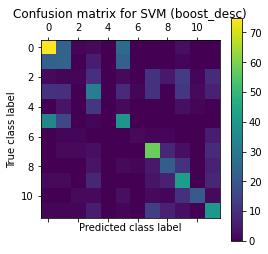



Average Log Loss for  SVM  ( boost_desc ): 1.566


***************** KNN ******************

classification accuracy for KNN (boost_desc): 0.2200247218788628
training accuracy for KNN (boost_desc): 0.6238787503866378

[[10  5 18 31  0  0  3 34 11  3  5 11]
 [ 2  9 10 23  0  1  1 14  4  5  2  6]
 [ 0  0 24  6  0  0  2  6  3  3  3  8]
 [ 1  2 13 25  0  0  6 17 10  6  4 11]
 [ 0  0  3  6  0  0  2  5  1  2  2  1]
 [ 3  5  7 26  1  1  4 17  5  4 10  7]
 [ 0  0  1  1  0  0  3  3  1  0  0  3]
 [ 0  0 15 19  0  0  3 34  3  1  1  9]
 [ 0  0  8  5  2  0  7  6 13  7  1  3]
 [ 0  0 15 12  0  0  3 11 10 16  1  5]
 [ 0  0  7  5  0  0  2  1  2  6 17  3]
 [ 0  0  8 11  1  0 10  8  5  2  3 26]]


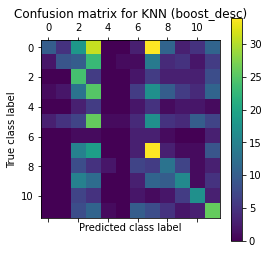



Average Log Loss for  KNN  ( boost_desc ): 22.238


************ Random Forest *************

classification accuracy for Random Forest (boost_desc): 0.36341161928306553
training accuracy for Random Forest (boost_desc): 1.0

[[90 16  0  1  0 22  0  0  0  2  0  0]
 [26 17  0  2  0 29  0  2  0  1  0  0]
 [ 3  0  1  5  0  2  0 17  3 16  0  8]
 [17  7  1 20  0  9  0 15  3 18  1  4]
 [ 2  1  0  9  0  5  0  0  0  5  0  0]
 [35 23  0  0  0 32  0  0  0  0  0  0]
 [ 0  0  0  1  0  0  0  3  1  1  0  6]
 [ 0  1  0  7  0  0  0 52  3  6  0 16]
 [ 3  0  0  8  0  1  0  7  6 17  0 10]
 [ 1  1  0 13  0  2  0  8  7 33  1  7]
 [ 3  0  1  7  0  4  0  1  3 11 11  2]
 [ 2  0  0  5  0  0  0 19  8  8  0 32]]


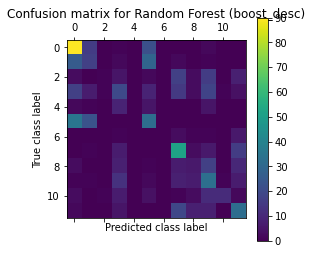



Average Log Loss for  Random Forest  ( boost_desc ): 1.793


********* Gaussian Naive Bayes *********

classification accuracy for Gaussian Naive Bayes (boost_desc): 0.32509270704573545
training accuracy for Gaussian Naive Bayes (boost_desc): 0.5988246210949583

[[34 35  2 12  1 29  2  1  2 10  2  1]
 [11 28  1  5  1 27  0  0  0  2  2  0]
 [ 6  0  3  2  2  3  2  6  5 12  4 10]
 [14 13  1 14  1 12  2  9  6 11  8  4]
 [ 3  3  1  2  1  4  0  2  0  3  2  1]
 [14 25  0 10  0 35  1  2  1  0  2  0]
 [ 0  1  0  1  0  1  2  1  1  2  0  3]
 [ 8  6  1  1  0  2  2 43  9  5  1  7]
 [ 2  0  1  1  0  3  4  4 22  7  2  6]
 [ 3  4  0  4  1  3  3  4  7 32  4  8]
 [ 0  2  1  1  0  1  3  1  2 12 20  0]
 [ 2  2  1  2  0  6  6  9  8  8  1 29]]


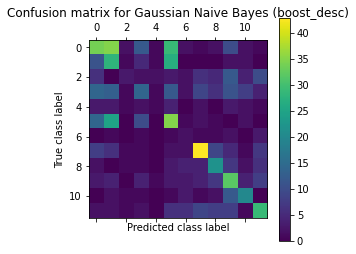



Average Log Loss for  Gaussian Naive Bayes  ( boost_desc ): 21.126


************ Decision Tree *************

classification accuracy for Decision Tree (boost_desc): 0.22991347342398022
training accuracy for Decision Tree (boost_desc): 1.0

[[47 24  2  9  4 40  0  1  1  2  0  1]
 [21 15  0  3  4 26  1  1  1  2  2  1]
 [ 3  0  6  9  1  2  2  4  3  8  7 10]
 [11  7  3 13  2 10  1 13 10  8  9  8]
 [ 4  1  0  6  2  0  0  2  3  3  0  1]
 [32 21  0  1  1 34  0  0  1  0  0  0]
 [ 1  0  0  0  0  0  5  0  1  2  0  3]
 [ 1  2  6 10  2  0  5 25  9 12  3 10]
 [ 2  0  9  4  2  1  2  6  8 10  2  6]
 [ 0  1  3 10  2  2  4  7 14 17  6  7]
 [ 2  1  4  5  1  2  2  5  3  9  2  7]
 [ 1  0  4 11  0  2  3 16 10 11  4 12]]


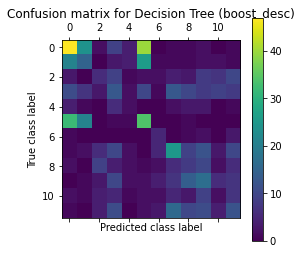



Average Log Loss for  Decision Tree  ( boost_desc ): 26.598


###################################  freak  ####################################
Number of encoded train images: 4042
training took 281.92861795425415 seconds

Number of images for training : 3233
Number of images for validation : 809


***************** SVM ******************

classification accuracy for SVM (freak): 0.40667490729295425
training accuracy for SVM (freak): 0.8444169502010517

[[74 26  0  0  0 31  0  0  0  0  0  0]
 [25 21  0  5  0 23  0  3  0  0  0  0]
 [ 2  3  6 10  0  0  0 16  9  6  1  2]
 [12 11  1 34  0  8  0 17  2  5  1  4]
 [ 2  4  0 12  0  0  0  2  1  1  0  0]
 [34 24  0  0  0 32  0  0  0  0  0  0]
 [ 0  0  0  3  0  0  4  2  1  0  0  2]
 [ 0  0  0  8  0  0  0 63  5  4  0  5]
 [ 1  1  1  2  0  1  0  8 20 17  0  1]
 [ 0  1  1 15  0  0  0 11  8 30  4  3]
 [ 2  1  1  7  0  2  0  4  3 14  8  1]
 [ 1  2  4  3  0  0  0 19  6  1  1 37]]


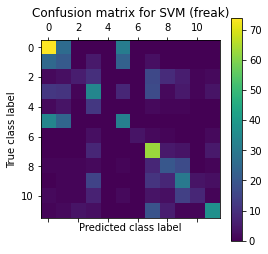



Average Log Loss for  SVM  ( freak ): 1.553


***************** KNN ******************

classification accuracy for KNN (freak): 0.19530284301606923
training accuracy for KNN (freak): 0.6220228889576245

[[ 9  8 25 38  0  3  3 16 11  3  3 12]
 [ 5  8 10 18  2  2  4  8  9  7  0  4]
 [ 1  0 14  9  0  0  3  3  7  9  2  7]
 [ 1  2 13 23  0  0  7 16  8  6  2 17]
 [ 0  2  5  2  0  0  2  4  0  3  0  4]
 [10  8 13 18  0  1  2 11  6 10  2  9]
 [ 0  0  1  2  0  0  7  1  0  0  0  1]
 [ 0  0 18 18  0  0  6 22  6  4  1 10]
 [ 0  0  9  7  1  0  5  7 14  4  1  4]
 [ 0  0  6 20  0  0  4  9  7 14  2 11]
 [ 0  0  8  4  1  0  2  5  3  5  9  6]
 [ 0  0 10  4  0  0  6  7  6  2  2 37]]


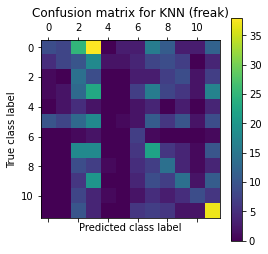



Average Log Loss for  KNN  ( freak ): 23.228


************ Random Forest *************

classification accuracy for Random Forest (freak): 0.3868974042027194
training accuracy for Random Forest (freak): 1.0

[[81 24  0  2  0 24  0  0  0  0  0  0]
 [26 21  0  3  0 24  0  2  0  1  0  0]
 [ 2  2  0 14  0  0  0 14  7  9  0  7]
 [14  5  0 32  0  9  0 15  1 14  0  5]
 [ 4  2  0  9  0  2  0  1  1  2  0  1]
 [38 18  0  0  0 34  0  0  0  0  0  0]
 [ 1  0  0  2  0  0  0  2  2  3  0  2]
 [ 1  0  1 10  0  0  0 57  4  5  0  7]
 [ 2  0  0  4  0  3  0 14  8 13  0  8]
 [ 5  0  0 12  0  0  0 10  2 36  0  8]
 [ 3  2  0 13  0  0  0  5  2 12  2  4]
 [ 4  0  0  3  0  0  0 21  2  2  0 42]]


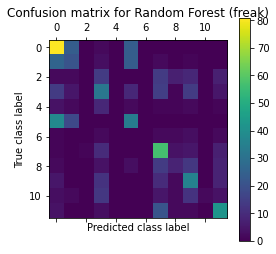



Average Log Loss for  Random Forest  ( freak ): 1.895


********* Gaussian Naive Bayes *********

classification accuracy for Gaussian Naive Bayes (freak): 0.3065512978986403
training accuracy for Gaussian Naive Bayes (freak): 0.6374884008660686

[[49 21  2 11 18 19  0  6  0  4  1  0]
 [13 17  1  6 18 18  0  4  0  0  0  0]
 [ 0  2  3  5  0  0  0 19  6 12  7  1]
 [ 8  4  0 12  9  3  1 23  3 23  3  6]
 [ 2  0  0 10  0  0  0  4  2  2  0  2]
 [29 13  0  6 12 18  0  0  6  3  1  2]
 [ 0  0  0  0  0  0  4  3  0  1  0  4]
 [ 0  0  1  4  0  0  1 59 11  8  0  1]
 [ 1  0  2  1  0  0  3 15 14 13  2  1]
 [ 1  1  2  3  2  0  0 10 14 35  4  1]
 [ 0  0  1  2  4  0  1  5  1 17 11  1]
 [ 0  1  2  0  0  0  2 22  5 14  2 26]]


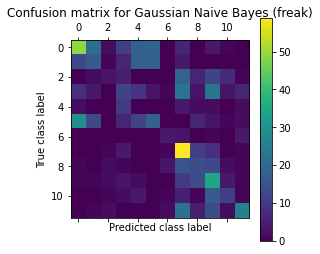



Average Log Loss for  Gaussian Naive Bayes  ( freak ): 21.499


************ Decision Tree *************

classification accuracy for Decision Tree (freak): 0.24721878862793573
training accuracy for Decision Tree (freak): 1.0

[[54 33  0  7  0 36  0  0  1  0  0  0]
 [25 14  3  5  0 25  0  1  0  1  1  2]
 [ 3  2  8  5  1  2  3  6 11  6  3  5]
 [ 7 10  7 21  1 10  0  4  5 16  5  9]
 [ 2  3  1  3  0  2  0  3  4  3  0  1]
 [25 23  1  7  1 32  0  0  0  0  1  0]
 [ 0  1  0  0  1  0  2  2  0  0  2  4]
 [ 0  2  5  9  0  0  3 19 14 20  4  9]
 [ 2  2  4  6  3  1  2  8  6 11  2  5]
 [ 2  5  3  7  1  2  4 13  3 15  6 12]
 [ 4  1  2  8  1  1  1  4  4  5  7  5]
 [ 2  2  9 10  0  2  4 10  5  7  1 22]]


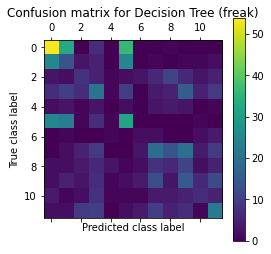



Average Log Loss for  Decision Tree  ( freak ): 26.000


###################################  daisy  ####################################
Number of encoded train images: 4042
training took 1138.7472050189972 seconds

Number of images for training : 3233
Number of images for validation : 809


***************** SVM ******************

classification accuracy for SVM (daisy): 0.5179233621755254
training accuracy for SVM (daisy): 0.8042066192390969

[[88 18  0 14  0 10  0  0  0  1  0  0]
 [16 35  1  5  0 17  0  2  0  1  0  0]
 [ 2  2 10  9  0  1  0 14  4  6  2  5]
 [13  5  4 38  0 10  0  6  4 10  3  2]
 [ 7  2  2  6  0  0  0  0  1  2  2  0]
 [17 17  0  3  0 53  0  0  0  0  0  0]
 [ 0  0  0  1  0  0  2  1  2  0  0  6]
 [ 1  0  4  7  0  0  0 60  2  2  1  8]
 [ 0  1  1  4  0  0  0  3 22 11  1  9]
 [ 1  1  4  3  0  0  0  5 11 45  3  0]
 [ 0  0  2  1  0  1  0  0  3  8 27  1]
 [ 2  0  3  8  0  1  0 11  5  4  1 39]]


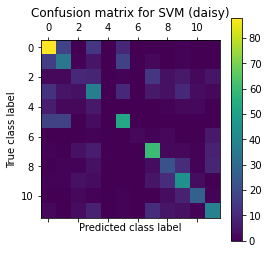



Average Log Loss for  SVM  ( daisy ): 1.389


***************** KNN ******************

classification accuracy for KNN (daisy): 0.32756489493201485
training accuracy for KNN (daisy): 0.6139808227652336

[[60  5 10 24  1  2  1 16  4  3  1  4]
 [15 31  4 10  1  6  0  7  0  0  2  1]
 [ 1  2 23  6  0  1  1 16  2  0  1  2]
 [12  7 18 26  1  3  0 14  2  4  6  2]
 [ 1  0  2  7  1  0  0  5  1  2  2  1]
 [26 30  2  9  1 10  2  7  1  0  2  0]
 [ 1  0  1  2  0  0  3  3  1  0  0  1]
 [ 0  0 13 12  0  0  4 44  2  1  1  8]
 [ 1  1  8  8  1  0  7  7  8  8  0  3]
 [ 1  0 14  8  0  1  3 12  6 20  3  5]
 [ 2  0  4  3  0  1  0  3  2  6 22  0]
 [ 0  0 11 12  1  0  2 20  7  0  4 17]]


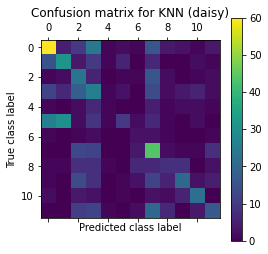



Average Log Loss for  KNN  ( daisy ): 16.131


************ Random Forest *************

classification accuracy for Random Forest (daisy): 0.44252163164400493
training accuracy for Random Forest (daisy): 1.0

[[90  9  0  3  0 24  0  0  0  3  2  0]
 [17 26  1  1  0 29  0  2  0  1  0  0]
 [ 6  1  5  6  0  0  0 19  2 11  2  3]
 [20  6  2 13  0 15  0 12  2 16  3  6]
 [ 6  1  0  4  0  0  0  0  0  7  3  1]
 [21 12  0  0  0 57  0  0  0  0  0  0]
 [ 1  0  0  2  0  0  0  1  1  1  0  6]
 [ 4  0  0  2  0  1  0 57  7  3  1 10]
 [ 4  0  0  2  0  3  0 11  8 12  1 11]
 [ 4  0  0  2  0  2  0  8  7 44  2  4]
 [ 1  0  0  0  0  2  0  4  1 16 17  2]
 [ 4  1  0  3  0  0  0 13  2  9  1 41]]


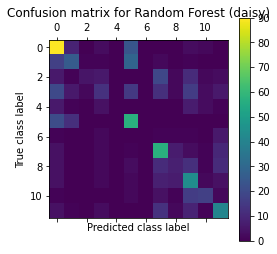



Average Log Loss for  Random Forest  ( daisy ): 1.828


********* Gaussian Naive Bayes *********

classification accuracy for Gaussian Naive Bayes (daisy): 0.38936959208899874
training accuracy for Gaussian Naive Bayes (daisy): 0.6204763377667801

[[60 25  5  6  6 20  0  2  1  5  0  1]
 [15 18  3  5  3 26  0  2  2  1  1  1]
 [ 2  0 19  4  9  0  0  6  3  4  3  5]
 [ 9  6 10 14  5 17  1 10  4  7  9  3]
 [ 4  0  2  1  2  4  0  2  0  1  4  2]
 [10 17  3  3  0 51  0  0  1  4  0  1]
 [ 1  0  3  0  0  0  4  1  1  1  0  1]
 [ 3  1 16  2  3  0  2 36  3  2  6 11]
 [ 2  1  4  1  1  1  0  5 11 10  4 12]
 [ 1  0  6  1  4  1  0  3 12 33  9  3]
 [ 1  0  0  0  1  1  0  0  2  5 29  4]
 [ 6  1  5  0  0  0  4  8  3  6  3 38]]


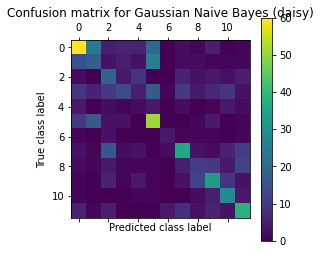



Average Log Loss for  Gaussian Naive Bayes  ( daisy ): 20.355


************ Decision Tree *************

classification accuracy for Decision Tree (daisy): 0.26328800988875156
training accuracy for Decision Tree (daisy): 1.0

[[50 32  3  6  0 24  0  2  2  7  3  2]
 [13 23  1  7  0 27  1  3  0  0  2  0]
 [ 5  3  7  6  0  3  0  6  5 10  4  6]
 [10 10  8 19  1  9  2 14  3  7  5  7]
 [ 1  4  0  4  1  1  0  2  2  5  1  1]
 [17 31  2  6  1 31  0  0  2  0  0  0]
 [ 0  1  0  2  1  0  3  1  0  3  0  1]
 [ 3  1  9 11  2  2  2 34  4  7  3  7]
 [ 3  3  3  9  0  2  4  6  6  6  1  9]
 [ 3  1  7 11  2  2  5 12  6  9  9  6]
 [ 0  5  0  0  1  0  1  3  4  7 14  8]
 [ 1  1  7  5  1  3  2 16 14  3  5 16]]


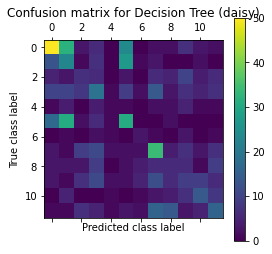



Average Log Loss for  Decision Tree  ( daisy ): 25.445


###################################  lucid  ####################################
Number of encoded train images: 4042
training took 356.8431589603424 seconds

Number of images for training : 3233
Number of images for validation : 809


***************** SVM ******************

classification accuracy for SVM (lucid): 0.3819530284301607
training accuracy for SVM (lucid): 0.6906897618311166

[[69 23  1  7  0 29  0  0  0  1  1  0]
 [19 37  0  2  0 16  0  0  0  1  2  0]
 [ 8  1  7  5  0  5  0 12  9  4  0  4]
 [10 11  2 29  0 12  0 12  6  2  5  6]
 [ 6  3  0  3  0  1  0  4  3  2  0  0]
 [22 27  0  4  0 35  0  1  0  0  1  0]
 [ 1  0  1  0  0  0  0  3  4  0  1  2]
 [ 5  1  2 10  0  2  0 38  9  4  2 12]
 [ 2  2  0  3  0  1  0  9 18  8  1  8]
 [ 8  0  1  4  0  1  0  4 15 29  3  8]
 [ 5  0  0  7  0  4  0  3  7  3 10  4]
 [ 0  0  0  5  0  2  0 12 12  5  1 37]]


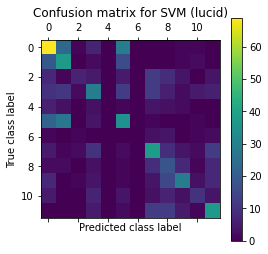



Average Log Loss for  SVM  ( lucid ): 1.841


***************** KNN ******************

classification accuracy for KNN (lucid): 0.17181705809641531
training accuracy for KNN (lucid): 0.5790287658521497

[[21 10 21 23  2  4  5 18 12  5  1  9]
 [ 9  4 15 16  1  0  5 12  8  2  1  4]
 [ 2  2 21  8  1  2  2  8  3  1  2  3]
 [ 5  5 20 18  0  3  7 17  7  1  7  5]
 [ 1  4  4  2  0  0  1  5  0  1  1  3]
 [ 5  7 14 14  0  6  4 21  6  2  3  8]
 [ 0  0  3  1  0  0  1  3  4  0  0  0]
 [ 3  0 20 10  1  1  7 27  7  2  1  6]
 [ 1  2  8  7  0  0  4 11 14  2  0  3]
 [ 4  1 12  8  0  0  3 14  9 14  2  6]
 [ 1  3 13  8  0  0  1  4  8  1  4  0]
 [ 0  2  9  8  0  0 12 12 18  1  3  9]]


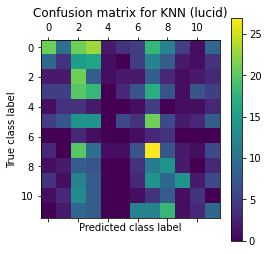



Average Log Loss for  KNN  ( lucid ): 22.804


************ Random Forest *************

classification accuracy for Random Forest (lucid): 0.37824474660074164
training accuracy for Random Forest (lucid): 1.0

[[71 27  0  0  0 32  0  0  0  1  0  0]
 [19 32  0  3  0 21  0  0  0  1  1  0]
 [ 5  3  2  8  0  3  0 15  3  5  1 10]
 [10 14  1 27  0 12  0  9  7  3  2 10]
 [ 9  0  0  2  0  1  0  6  0  3  0  1]
 [26 18  0  0  0 46  0  0  0  0  0  0]
 [ 1  0  0  3  0  0  0  2  2  0  0  4]
 [ 4  0  1 12  0  1  0 36 10  6  0 15]
 [ 4  0  0  4  0  1  0 12 16  8  0  7]
 [ 9  0  0 12  0  0  0  5  4 33  0 10]
 [ 6  4  0  7  0  4  0  5  5  5  2  5]
 [ 0  2  0  6  0  2  0 10 10  2  1 41]]


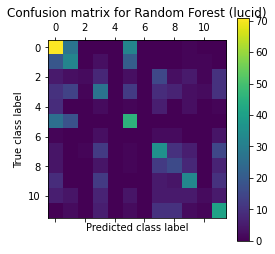



Average Log Loss for  Random Forest  ( lucid ): 2.043


********* Gaussian Naive Bayes *********

classification accuracy for Gaussian Naive Bayes (lucid): 0.1903584672435105
training accuracy for Gaussian Naive Bayes (lucid): 0.3504484998453449

[[27 21  5  1 10 18 22  9  2  9  3  4]
 [ 1 26  2  0  1 16 28  1  0  0  0  2]
 [ 4  9  9  1  3  6 12  5  2  1  1  2]
 [ 1 28  4  1  3 14 24 10  1  4  2  3]
 [ 1  8  2  0  0  2  3  0  1  4  1  0]
 [ 4 34  1  0  6 18 21  3  1  1  1  0]
 [ 0  1  0  0  0  2  9  0  0  0  0  0]
 [ 0 16  6  0  1 13 28  8  1  5  1  6]
 [ 0  9  0  1  0  6 26  0  2  3  0  5]
 [ 6  4  2  0  1  5  6  2  2 38  2  5]
 [ 1  2  3  0  2  1 20  0  0  5  7  2]
 [ 2 10  1  0  1  8 31  8  0  3  1  9]]


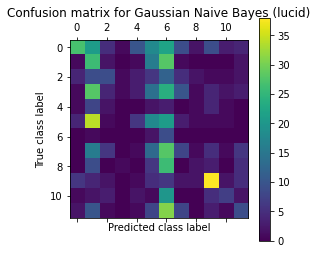



Average Log Loss for  Gaussian Naive Bayes  ( lucid ): 27.748


************ Decision Tree *************

classification accuracy for Decision Tree (lucid): 0.2027194066749073
training accuracy for Decision Tree (lucid): 1.0

[[47 23  3  8  2 36  0  2  5  2  3  0]
 [23 16  4  6  0 18  0  5  1  1  1  2]
 [ 3  6  6  7  1  1  2  6  7  5  1 10]
 [12  8  7 18  3  9  1  8  6  9 10  4]
 [ 3  3  2  2  0  1  2  2  1  6  0  0]
 [20 27  5  9  0 22  0  2  2  0  1  2]
 [ 1  0  0  2  0  0  2  1  2  2  1  1]
 [ 5  2  6  6  3  3  0 17 14 14  7  8]
 [ 3  2  6  7  1  0  3  2  6  9  3 10]
 [ 6  1  5 10  0  6  2  8  6 10  7 12]
 [ 6  3  5  3  1  2  3  3  2  7  6  2]
 [ 2  0  4 12  1  1  5 14 11  9  1 14]]


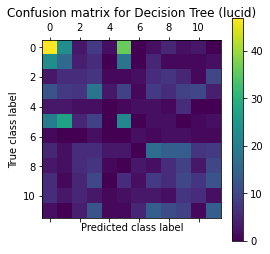



Average Log Loss for  Decision Tree  ( lucid ): 27.537


####################################  orb  #####################################
Number of encoded train images: 4042
training took 439.53408908843994 seconds

Number of images for training : 3233
Number of images for validation : 809


***************** SVM ******************

classification accuracy for SVM (orb): 0.36711990111248455
training accuracy for SVM (orb): 0.7943086916176926

[[79 13  1  9  0 11  0  5  5  3  0  5]
 [12 24  2  6  0 21  0  6  0  3  1  2]
 [ 3  4  2 16  0  1  0  6  8 10  0  5]
 [19  6  2 20  0  7  0  9  6 17  1  8]
 [ 4  5  0  4  0  1  0  2  2  3  0  1]
 [19 23  0  8  0 32  0  3  1  2  0  2]
 [ 2  0  0  0  0  0  4  1  0  1  0  4]
 [ 6  6  1  9  0  0  0 44  4  3  1 11]
 [ 1  2  0  9  0  0  1  5 11  9  3 11]
 [ 7  4  0  7  0  7  0  5  9 24  2  8]
 [ 3  4  1  5  0  2  0  3  0 12 12  1]
 [ 5  1  1  5  0  0  0  9  6  2  0 45]]


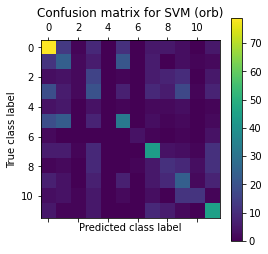



Average Log Loss for  SVM  ( orb ): 1.848


***************** KNN ******************

classification accuracy for KNN (orb): 0.21631644004944375
training accuracy for KNN (orb): 0.5818125579956697

[[45 12 16 22  1  7  2  6  8  4  2  6]
 [15 12 12 16  0  3  1  6  6  4  2  0]
 [ 4  1 26  9  3  1  0  6  1  2  1  1]
 [ 8  7 16 27  4  1  2  7  9  5  4  5]
 [ 4  1  5  2  1  0  0  1  1  0  4  3]
 [19 19 12 14  4  5  0  8  2  0  2  5]
 [ 0  1  0  1  0  0  7  1  1  0  0  1]
 [ 5  4 22 11  3  4  6 11  5  1  3 10]
 [ 2  2 10  8  1  0  4  6  8  3  1  7]
 [ 7  5 14 17  0  0  2  6  8  5  3  6]
 [ 4  1  9 12  0  1  2  2  1  2  8  1]
 [ 3  1  9 10  0  1 15  3  7  4  1 20]]


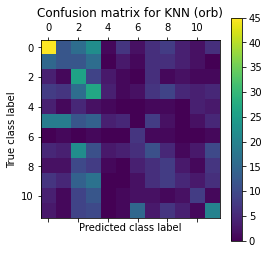



Average Log Loss for  KNN  ( orb ): 20.933


************ Random Forest *************

classification accuracy for Random Forest (orb): 0.2694684796044499
training accuracy for Random Forest (orb): 1.0

[[61 17  2 11  0 19  0  4  0 16  0  1]
 [23 12  1  5  0 21  0  5  1  7  0  2]
 [ 5  2  2 11  0  2  0  6  8 12  0  7]
 [15  5  0 23  0  6  0 12  6 17  2  9]
 [ 1  1  0  5  0  0  0  4  2  6  1  2]
 [34 11  1  5  0 25  0  4  1  6  1  2]
 [ 0  0  0  1  0  1  1  0  0  2  0  7]
 [11  0  0 13  0  3  0 26  5 14  0 13]
 [ 4  2  0 11  0  4  0  9  1 11  4  6]
 [ 5  0  0 18  0  1  0  6  5 29  1  8]
 [ 3  0  0  9  0  2  0  3  1 14  7  4]
 [ 6  1  0  9  0  2  0 11  5  9  0 31]]


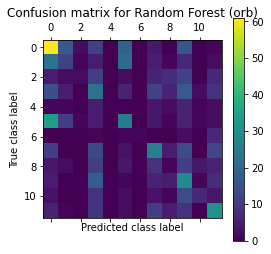



Average Log Loss for  Random Forest  ( orb ): 2.259


********* Gaussian Naive Bayes *********

classification accuracy for Gaussian Naive Bayes (orb): 0.29666254635352285
training accuracy for Gaussian Naive Bayes (orb): 0.543767398700897

[[46 18  1  7  8  9  0  6 18  1  5 12]
 [ 7 18  1  2  1 15  0 11  7  4  5  6]
 [ 3  3  1  5  5  1  0  7 18  3  3  6]
 [12  8  1 18  4  3  1 11 12  6  8 11]
 [ 2  3  0  0  2  0  0  3  3  0  4  5]
 [15 13  1  3  2 26  1 13  5  4  4  3]
 [ 0  0  0  0  0  0  7  1  1  0  0  3]
 [ 2  7  0  2  4  3  1 35 10  2  4 15]
 [ 2  4  0  2  1  0  3  4 19  2  5 10]
 [ 4  3  2  6  1  2  2  5 18 11 10  9]
 [ 1  3  0  2  3  1  0  3  7  5 17  1]
 [ 2  1  1  1  1  0  4 11 11  2  0 40]]


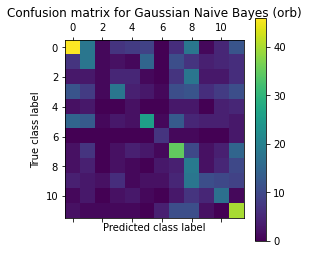



Average Log Loss for  Gaussian Naive Bayes  ( orb ): 19.763


************ Decision Tree *************

classification accuracy for Decision Tree (orb): 0.12855377008652658
training accuracy for Decision Tree (orb): 1.0

[[20 21  4 13  2 25  2 13  5 14  4  8]
 [12 11  3  7  1 20  0  4  4  2  3 10]
 [ 3  5  4  8  0  6  1  7  4 10  3  4]
 [10 11  2 11  2 11  4 11 13 11  3  6]
 [ 2  2  2  3  0  2  1  3  1  4  1  1]
 [11 22  2  7  2 20  2  8  1  6  3  6]
 [ 1  2  0  0  0  0  3  0  1  0  1  4]
 [ 5  4  6 11  0  6  5 11 10 15  8  4]
 [ 6  3  5  5  2  1  2  8  4  5  3  8]
 [ 4  2  4  8  0  7  3  9  7 10  8 11]
 [ 5  4  5  4  2  2  1  4  4  7  3  2]
 [ 6  7  1 10  0  4  5 13  8  6  7  7]]


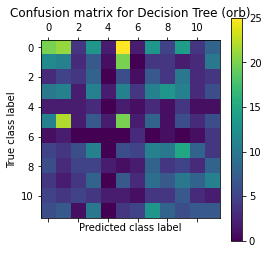



Average Log Loss for  Decision Tree  ( orb ): 30.099


####################################  sift  ####################################
Number of encoded train images: 4042
training took 625.7512691020966 seconds

Number of images for training : 3233
Number of images for validation : 809


***************** SVM ******************

classification accuracy for SVM (sift): 0.5080346106304079
training accuracy for SVM (sift): 0.8314259201979586

[[84 19  1  4  0 20  1  0  1  1  0  0]
 [10 37  0  5  0 21  0  0  1  3  0  0]
 [ 2  2 11  7  0  0  0 16  4  6  4  3]
 [12  9  3 32  0 15  0  8  6  5  2  3]
 [ 6  0  1  5  0  3  0  0  1  3  1  2]
 [21 11  0  3  0 54  0  0  0  0  1  0]
 [ 1  0  0  0  0  0 10  1  0  0  0  0]
 [ 2  0  3  3  0  1  0 56 11  4  2  3]
 [ 1  1  2  3  0  1  0  4 20 14  1  5]
 [ 2  1  0  3  0  2  0  4  8 39  7  7]
 [ 0  1  1  3  0  0  0  1  4 11 20  2]
 [ 0  0  1  0  0  0  0 16  2  7  0 48]]


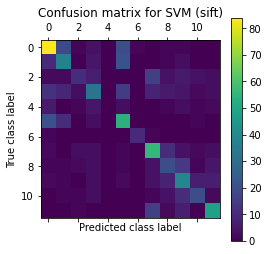



Average Log Loss for  SVM  ( sift ): 1.426


***************** KNN ******************

classification accuracy for KNN (sift): 0.35970333745364647
training accuracy for KNN (sift): 0.6359418496752243

[[66 15  7 14  3  7  3  3  0  7  5  1]
 [13 31  4  2  5  9  0  2  0  3  8  0]
 [ 2  2 21  3  2  0  0  9  5  3  8  0]
 [13  8 16 23  1  6  0  6  7  6  8  1]
 [ 4  3  1  8  0  0  0  0  2  1  1  2]
 [24 20  1 10  1 17  0  2  1  6  7  1]
 [ 0  0  2  0  0  0  9  1  0  0  0  0]
 [ 2  2 26 11  1  0  1 32  5  3  1  1]
 [ 3  2 13  5  0  0  1  4 10  8  2  4]
 [ 2  3 13  7  0  1  1  3  5 20 15  3]
 [ 0  1  4  5  1  1  0  2  2  3 22  2]
 [ 0  2 14  3  0  1  2  7  2  3  0 40]]


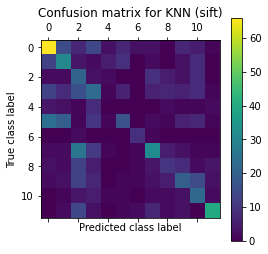



Average Log Loss for  KNN  ( sift ): 14.734


************ Random Forest *************

classification accuracy for Random Forest (sift): 0.377008652657602
training accuracy for Random Forest (sift): 1.0

[[76 19  1  8  0 21  1  1  1  3  0  0]
 [22 24  0  2  0 24  0  1  0  4  0  0]
 [ 4  5  4  5  0  1  0 13  3  7  3 10]
 [24 11  0  8  0 20  0  9  6 12  0  5]
 [ 7  1  0  3  0  4  0  2  0  2  0  3]
 [22 20  0  0  0 43  0  2  0  3  0  0]
 [ 2  1  0  0  0  0  6  3  0  0  0  0]
 [15  1  0  4  0  3  1 39  5  7  1  9]
 [ 3  4  1  1  0  2  0  7 11  8  1 14]
 [ 3  3  0  5  0  6  0  6  6 29  3 12]
 [ 1  3  0  1  0  2  0  3  2 13 12  6]
 [ 2  0  0  1  0  0  0  7  8  3  0 53]]


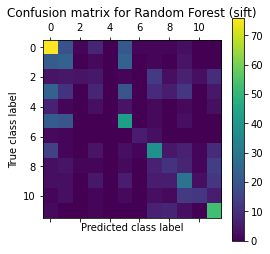



Average Log Loss for  Random Forest  ( sift ): 1.946


********* Gaussian Naive Bayes *********

classification accuracy for Gaussian Naive Bayes (sift): 0.4042027194066749
training accuracy for Gaussian Naive Bayes (sift): 0.5610887720383545

[[69 24  1  4  1 25  1  1  1  1  2  1]
 [13 42  0  0  1 15  0  1  1  1  3  0]
 [ 1  5  3  1  2  2  2  9  9  3 11  7]
 [13 17  1 14  2 15  4  5  8  8  4  4]
 [ 4  5  0  1  0  2  1  1  1  3  3  1]
 [21 22  0  0  0 45  0  0  0  1  1  0]
 [ 2  0  0  0  0  0  8  0  1  0  0  1]
 [ 3  1  4  6  0  1  7 32  9  5  4 13]
 [ 3  1  0  2  0  2  1  4 18  5  3 13]
 [ 0  3  0  0  1  5  2  3 10 23 13 13]
 [ 0  1  0  1  1  2  0  1  2  5 25  5]
 [ 0  0  0  0  0  0  1  5  8 10  2 48]]


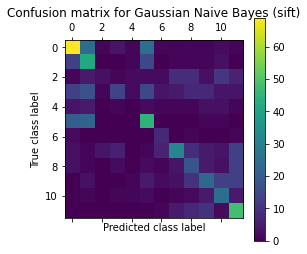



Average Log Loss for  Gaussian Naive Bayes  ( sift ): 18.229


************ Decision Tree *************

classification accuracy for Decision Tree (sift): 0.21631644004944375
training accuracy for Decision Tree (sift): 1.0

[[29 22  5 14  3 18  3 10  7 14  1  5]
 [13 23  1  8  2 15  0  1  2  5  3  4]
 [ 1  2  8  5  2  2  0  9  4 13  4  5]
 [ 6  9  5 16  7 12  0 10  9 11  3  7]
 [ 6  3  1  3  0  1  0  3  1  0  0  4]
 [11 15  0 13  0 22  2  8  5  4  5  5]
 [ 0  0  1  1  0  1  4  2  1  1  0  1]
 [ 5  1  7  8  0  7  2 21  9  8  7 10]
 [ 3  4  2  7  1  4  1  7  5  9  2  7]
 [ 5  5  3 10  0  8  0  8  5 13  7  9]
 [ 2  3  0  4  1  2  0  4  5  9 11  2]
 [ 4  1  6  6  0  0  3 12  9  9  1 23]]


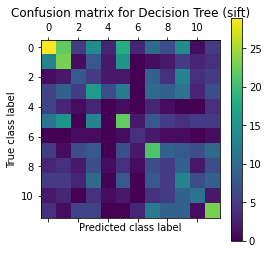



Average Log Loss for  Decision Tree  ( sift ): 27.067


####################################  vgg  #####################################
Number of encoded train images: 4042
training took 409.79981422424316 seconds

Number of images for training : 3233
Number of images for validation : 809


***************** SVM ******************

classification accuracy for SVM (vgg): 0.4796044499381953
training accuracy for SVM (vgg): 0.8274048871017631

[[90 16  0  3  0 22  0  0  0  0  0  0]
 [13 37  0  2  0 22  0  2  0  1  0  0]
 [ 2  3  4 11  0  0  0 16  4  4  0 11]
 [ 9 12  2 30  0  9  1 12  3  6  2  9]
 [ 1  2  1  8  0  4  0  1  0  0  3  2]
 [27 19  0  2  0 42  0  0  0  0  0  0]
 [ 0  0  0  1  0  0  2  1  0  1  0  7]
 [ 0  0  3  5  0  0  0 65  4  3  0  5]
 [ 2  1  0  2  0  1  0  6 22 12  1  5]
 [ 3  0  3  6  0  1  0  7  9 38  3  3]
 [ 3  0  2  3  0  1  0  0  0  9 21  4]
 [ 2  0  2  9  0  0  0 13  7  4  0 37]]


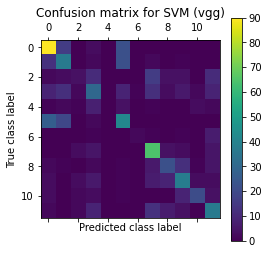



Average Log Loss for  SVM  ( vgg ): 1.500


***************** KNN ******************

classification accuracy for KNN (vgg): 0.21631644004944375
training accuracy for KNN (vgg): 0.636560470151562

[[ 7  3 22 21  1  1  7 35 16  3  4 11]
 [ 1  8  8 24  1  1  0 10  4 10  3  7]
 [ 0  0 14  8  0  0  5  9  4  1  6  8]
 [ 1  0 11 25  1  0 14 14 10  4  1 14]
 [ 0  0  3  3  0  0  5  5  0  1  2  3]
 [ 2  4 16 19  1  1  0 18  9  7  5  8]
 [ 0  0  0  1  0  0  4  1  0  0  0  6]
 [ 0  2 13 10  0  0  5 40  5  4  1  5]
 [ 0  0  8  5  0  0  5  8 20  3  1  2]
 [ 0  0 10 14  0  0  5  9 13 15  3  4]
 [ 0  0  6  3  0  1  3  2  4  3 17  4]
 [ 0  0  8  9  0  0 12 10  6  2  3 24]]


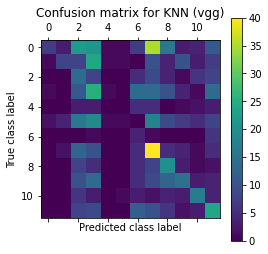



Average Log Loss for  KNN  ( vgg ): 22.523


************ Random Forest *************

classification accuracy for Random Forest (vgg): 0.38442521631644005
training accuracy for Random Forest (vgg): 1.0

[[91  8  0  1  0 31  0  0  0  0  0  0]
 [25 17  0  2  0 30  0  3  0  0  0  0]
 [ 1  4  0 10  0  1  0 13  4  6  3 13]
 [14  8  0 26  0  7  0 10  5 15  1  9]
 [ 5  0  0 12  0  2  0  2  0  1  0  0]
 [37 18  0  0  0 35  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  1  1  2  0  8]
 [ 0  1  1  7  0  0  0 62  3  2  0  9]
 [ 2  0  0 12  0  3  0 11  7 12  0  5]
 [ 4  4  0 10  0  0  0 13  6 27  0  9]
 [ 6  1  0  6  0  4  0  5  0  8 13  0]
 [ 2  0  0  8  0  0  0 22  4  5  0 33]]


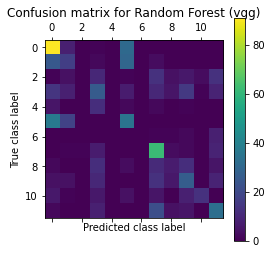



Average Log Loss for  Random Forest  ( vgg ): 1.885


********* Gaussian Naive Bayes *********

classification accuracy for Gaussian Naive Bayes (vgg): 0.3695920889987639
training accuracy for Gaussian Naive Bayes (vgg): 0.6696566656356325

[[67 18  4  5 10 15  0  0  6  5  1  0]
 [15 27  1  3  9 20  0  2  0  0  0  0]
 [ 3  1  1  7  2  0  2 14  5  7  4  9]
 [16  7  1 17  3  8  4 15  4  8  5  7]
 [ 3  1  1  7  2  4  0  2  0  0  1  1]
 [29 16  0  5  7 28  0  0  0  5  0  0]
 [ 1  0  0  1  1  0  3  1  1  2  0  2]
 [ 6  1  2  2  1  1  2 55 10  2  1  2]
 [ 3  2  0  4  0  0  3  7 17 13  1  2]
 [ 1  0  3  5  0  1  1  9 10 33  5  5]
 [ 1  0  0  1  5  1  1  2  0 10 20  2]
 [ 2  1  4  3  0  1  6 13  6  6  3 29]]


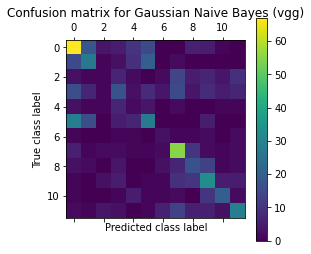



Average Log Loss for  Gaussian Naive Bayes  ( vgg ): 19.576


************ Decision Tree *************

classification accuracy for Decision Tree (vgg): 0.2138442521631644
training accuracy for Decision Tree (vgg): 1.0

[[46 30  3 10  1 30  0  1  1  8  1  0]
 [23 19  1  3  0 25  0  2  0  1  1  2]
 [ 1  2  5 12  2  2  1  9  5  6  6  4]
 [10 10  5 16  4  9  1 10  7  8  8  7]
 [ 3  2  0  6  0  2  0  1  2  4  1  1]
 [15 38  3  3  0 20  0  2  1  3  4  1]
 [ 0  0  1  2  0  0  0  3  1  1  0  4]
 [ 1  3  5 14  2  2  3 20  8  7  3 17]
 [ 2  3  5  6  0  1  1  4  8 11  2  9]
 [ 3  1  3  8  0  3  0 12 12 13  8 10]
 [ 3  1  2  7  1  4  1  3  9  4  7  1]
 [ 1  1  3 14  2  1  1 13  8  9  2 19]]


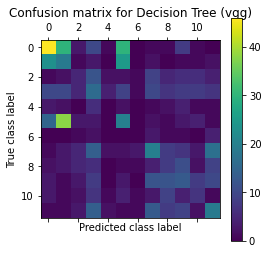



Average Log Loss for  Decision Tree  ( vgg ): 27.153




In [10]:
for descriptor_desired in descriptors:
    
    print(f'  {descriptor_desired}  '.center(80,'#'))
    
    with open(filepattern_descriptor_train.format(descriptor_desired), 'rb') as pkl_file_train:
        train_features_from_pkl = pickle.load(pkl_file_train)
    
    print('Number of encoded train images: {}'.format(len(train_features_from_pkl)))
    
    codebook_size = 1700

    clustered_codebook = helpers.createCodebook(train_features_from_pkl, codebook_size=codebook_size)
    
    # encode all train images 
    train_data = []
    train_labels = []

    for image_features in train_features_from_pkl:
        bow_feature_vector = helpers.encodeImage(image_features.data, clustered_codebook)
        train_data.append(bow_feature_vector)
        train_labels.append(image_features.label)
             
    # use a labelencoder to obtain numerical labels
    label_encoder = sklearn.preprocessing.LabelEncoder()
    label_encoder.fit(label_strings)
    train_labels = label_encoder.transform(train_labels)
    
    #Split Train Data for training and validations.
    X_train, X_valid, ytrain, yvalid = train_test_split(train_data, train_labels, test_size=0.2,random_state=42)
    
    print("\nNumber of images for training :",len(X_train))
    print("Number of images for validation :", len(X_valid))

 
    evaluate_models(X_train, X_valid, ytrain, yvalid, descriptor_desired)